In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import statistics
import math
import scipy as sp
from lgca import get_lgca
from lgca.helpers import *
from lgca.analysis import *
from scipy import stats, optimize, interpolate
# from scipy.optimize import curve_fit
# from scipy.special import factorial


node1 = np.load('saved_data/thoms501/5011_499_85a7377_thom_500.npy')
node2 = np.load('saved_data/thoms501/5011_499_eed5538_thom_500.npy')
thom01 = np.concatenate((node1,node2))
print(len(thom01))
print(node1[:5], node2[-5:])
print(thom01[:5], thom01[-5:])

rc1 = np.load('saved_data/thoms501/501167_499_beba81c_thom_500.npy')
rc2 = np.load('saved_data/thoms501/501167_499_e1328eb_thom_500.npy')
thom167 = np.concatenate((rc1,rc2))
print(len(thom167))
print(rc1[:5], rc2[-5:])
print(thom167[:5], thom167[-5:])
data = {'onenode': thom01, 'onerc': thom167}
colors = ['darkred', 'darkturquoise']

np.save('saved_')


1000
[20130 17801 31948 11706 31525] [21982 17613 12108 22758 15667]
[20130 17801 31948 11706 31525] [21982 17613 12108 22758 15667]
1000
[23502 24467 14002 35829 40609] [59447 43436 39345 55018 20362]
[23502 24467 14002 35829 40609] [59447 43436 39345 55018 20362]


In [14]:
'''
Berechung der barwidth für Histogramm
'''
#for entry, name in enumerate(data):
#     m = data[name].max()
#     s = data[name].std()
    
#     h = 3.49 * s / ((m)**(1/3))
#     print(h)


507.89184218858935
8531503.0
471.2288170974817
8513946.0
533.2411742036438
9564042.0
514.4605898860743
9810638.0


sigma 0.50801362095808
mu 3.7386331577976506
x [   250.    750.   1250.   1750.   2250.   2750.   3250.   3750.   4250.
   4750.   5250.   5750.   6250.   6750.   7250.   7750.   8250.   8750.
   9250.   9750.  10250.  10750.  11250.  11750.  12250.  12750.  13250.
  13750.  14250.  14750.  15250.  15750.  16250.  16750.  17250.  17750.
  18250.  18750.  19250.  19750.  20250.  20750.  21250.  21750.  22250.
  22750.  23250.  23750.  24250.  24750.  25250.  25750.  26250.  26750.
  27250.  27750.  28250.  28750.  29250.  29750.  30250.  30750.  31250.
  31750.  32250.  32750.  33250.  33750.  34250.  34750.  35250.  35750.
  36250.  36750.  37250.  37750.  38250.  38750.  39250.  39750.  40250.
  40750.  41250.  41750.  42250.  42750.  43250.  43750.  44250.  44750.
  45250.  45750.  46250.  46750.  47250.  47750.  48250.  48750.  49250.
  49750.  50250.  50750.  51250.  51750.  52250.  52750.  53250.  53750.
  54250.  54750.  55250.  55750.  56250.  56750.  57250.  57750.  58250.
  58

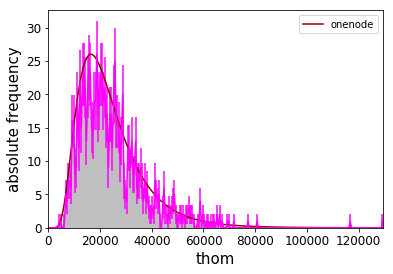

sigma 0.5643625209025959
mu 4.011864589973497
x [   250.    750.   1250.   1750.   2250.   2750.   3250.   3750.   4250.
   4750.   5250.   5750.   6250.   6750.   7250.   7750.   8250.   8750.
   9250.   9750.  10250.  10750.  11250.  11750.  12250.  12750.  13250.
  13750.  14250.  14750.  15250.  15750.  16250.  16750.  17250.  17750.
  18250.  18750.  19250.  19750.  20250.  20750.  21250.  21750.  22250.
  22750.  23250.  23750.  24250.  24750.  25250.  25750.  26250.  26750.
  27250.  27750.  28250.  28750.  29250.  29750.  30250.  30750.  31250.
  31750.  32250.  32750.  33250.  33750.  34250.  34750.  35250.  35750.
  36250.  36750.  37250.  37750.  38250.  38750.  39250.  39750.  40250.
  40750.  41250.  41750.  42250.  42750.  43250.  43750.  44250.  44750.
  45250.  45750.  46250.  46750.  47250.  47750.  48250.  48750.  49250.
  49750.  50250.  50750.  51250.  51750.  52250.  52750.  53250.  53750.
  54250.  54750.  55250.  55750.  56250.  56750.  57250.  57750.  58250.
  5

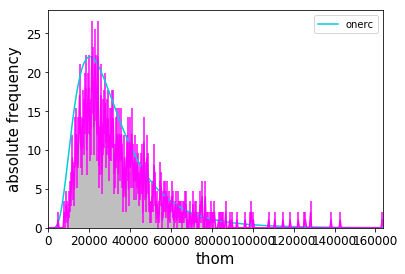

In [11]:
for entry, name in enumerate(data):
      plot_lognorm_distribution(thom=data[name], int_length=500, save=False, id=name, c=colors[entry])

sigma 0.5431917670520463
mu 1.9542238112376653
a 1648.7924781971285
sigma 0.5321989427863811
mu 1.9703987952697108
a 1796.5477718824095
sigma 0.5468542089032423
mu 2.0344676530554504
a 1551.9683886930575
sigma 0.5574984122334647
mu 2.043372048218809
a 1531.7936732719827


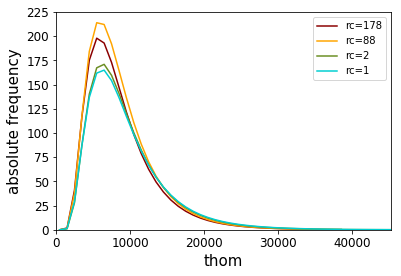

In [3]:
plot_all_lognorm(thomarray=data, colorarray=colors, int_length=1000, save=False)

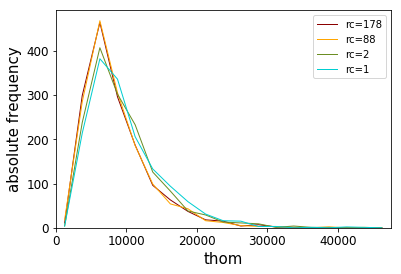

In [4]:
filename = ''
intervall = 2500
for i, key in enumerate(data):
    filename = filename + str(key) + '_'
thom_all(time_array=data, int_length = intervall, save=False, id=filename + 'li=' + str(intervall))

In [5]:
'''
Kontrolle
'''
# def f(val, sigma, mu):
#     if val != 0:
#         return 1/(math.sqrt(2*math.pi)*sigma*(val)) * math.exp(-(math.log(val)-mu)**2/(2*sigma**2))
#     else:
#         return 0



# x = np.arange(0,56,1)
# y = [f(val=v, sigma=0.5936, mu=2.3) for v in x]
# y = [yy*628 for yy in y]

# # print(y)
# plt.plot(np.arange(0,56000,1000),y, color='red', linestyle='dashed')


'\nKontrolle\n'